# Step 3: Data Validation

Use the code below to run TensorFlow Data Validation on your pipeline.  Start by importing and opening the metadata store.

In [1]:
from __future__ import print_function

import os
import tfx_utils
%matplotlib notebook
# %matplotlib widget
# from IPython.display import display_html
import pandas as pd
pd.set_option("max_colwidth", 100)

def _make_default_sqlite_uri(pipeline_name):
    return os.path.join('/home/tfx/tfx/metadata', pipeline_name, 'metadata.db')

def get_metadata_store(pipeline_name):
    return tfx_utils.TFXReadonlyMetadataStore.from_sqlite_db(_make_default_sqlite_uri(pipeline_name))

# pipeline_name = 'taxi'
pipeline_name = 'taxi_solution'

pipeline_db_path = _make_default_sqlite_uri(pipeline_name)
print('Pipeline DB:\n{}'.format(pipeline_db_path))

2021-10-23 19:53:35.804517: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-23 19:53:35.804577: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Pipeline DB:
/home/tfx/tfx/metadata/taxi_solution/metadata.db


In [2]:
store = get_metadata_store(pipeline_name)

RuntimeError: Cannot connect sqlite3 database: unable to open database file

In [3]:
store.get_artifacts()

,URI,SPLIT_NAMES,SPAN,INPUT_FINGERPRINT,TFX_VERSION,FILE_FORMAT,PAYLOAD_FORMAT,STATE,PRODUCER_COMPONENT,NAME,CURRENT_MODEL,BLESSED,CURRENT_MODEL_ID,PUSHED,PUSHED_DESTINATION,PUSHED_VERSION
ID,,,,,,,,,,,,,,,,
1,/opt/airflow/tfx/pipelines/taxi_solution/CsvExampleGen/examples/2,"[""train"", ""eval""]",,"split:single_split,num_files:1,total_bytes:1922668,xor_checksum:1632951534,sum_checksum:1632951534",1.2.0,tfrecords_gzip,FORMAT_TF_EXAMPLE,published,-,-,-,-,-,-,-,-
2,/opt/airflow/tfx/pipelines/taxi_solution/StatisticsGen/statistics/3,"[""train"", ""eval""]",-,-,1.2.0,-,-,published,StatisticsGen,statistics,-,-,-,-,-,-
3,/opt/airflow/tfx/pipelines/taxi_solution/SchemaGen/schema/4,-,-,-,1.2.0,-,-,published,SchemaGen,schema,-,-,-,-,-,-
4,/opt/airflow/tfx/pipelines/taxi_solution/Transform/transform_graph/5,-,-,-,1.2.0,-,-,published,Transform,transform_graph,-,-,-,-,-,-
5,/opt/airflow/tfx/pipelines/taxi_solution/Transform/transformed_examples/5,"[""train"", ""eval""]",-,-,1.2.0,-,-,published,Transform,transformed_examples,-,-,-,-,-,-
6,/opt/airflow/tfx/pipelines/taxi_solution/Transform/updated_analyzer_cache/5,-,-,-,1.2.0,-,-,published,Transform,updated_analyzer_cache,-,-,-,-,-,-
7,/opt/airflow/tfx/pipelines/taxi_solution/Transform/pre_transform_schema/5,-,-,-,1.2.0,-,-,published,Transform,pre_transform_schema,-,-,-,-,-,-
8,/opt/airflow/tfx/pipelines/taxi_solution/Transform/pre_transform_stats/5,-,-,-,1.2.0,-,-,published,Transform,pre_transform_stats,-,-,-,-,-,-
9,/opt/airflow/tfx/pipelines/taxi_solution/Transform/post_transform_schema/5,-,-,-,1.2.0,-,-,published,Transform,post_transform_schema,-,-,-,-,-,-


Now print out the data artifacts:

In [4]:
# Visualize properties of example artifacts
store.get_artifacts_of_type_df(tfx_utils.TFXArtifactTypes.EXAMPLES)

,URI,SPLIT_NAMES,INPUT_FINGERPRINT,SPAN,STATE,TFX_VERSION,PAYLOAD_FORMAT,FILE_FORMAT,NAME,PRODUCER_COMPONENT
ID,,,,,,,,,,
1,/opt/airflow/tfx/pipelines/taxi_solution/CsvExampleGen/examples/2,"[""train"", ""eval""]","split:single_split,num_files:1,total_bytes:1922668,xor_checksum:1632951534,sum_checksum:1632951534",,published,1.2.0,FORMAT_TF_EXAMPLE,tfrecords_gzip,-,-
5,/opt/airflow/tfx/pipelines/taxi_solution/Transform/transformed_examples/5,"[""train"", ""eval""]",-,-,published,1.2.0,-,-,transformed_examples,Transform


In [5]:
store.get_dest_artifact_of_type(1, tfx_utils.TFXArtifactTypes.EXAMPLE_STATS)

id: 2
type_id: 17
uri: "/opt/airflow/tfx/pipelines/taxi_solution/StatisticsGen/statistics/3"
properties {
  key: "split_names"
  value {
    string_value: "[\"train\", \"eval\"]"
  }
}
custom_properties {
  key: "name"
  value {
    string_value: "statistics"
  }
}
custom_properties {
  key: "producer_component"
  value {
    string_value: "StatisticsGen"
  }
}
custom_properties {
  key: "state"
  value {
    string_value: "published"
  }
}
custom_properties {
  key: "tfx_version"
  value {
    string_value: "1.2.0"
  }
}
state: LIVE
create_time_since_epoch: 1634633697647
last_update_time_since_epoch: 1634633711389

Now visualize the dataset features.

Hint: try ID 2 or 3

In [6]:
# Visualize stats for data
store.display_stats_for_examples(1)

READING /opt/airflow/tfx/pipelines/taxi_solution/StatisticsGen/statistics/3/Split-train/FeatureStats.pb


In [7]:
# visualize_artifacts([store.get_artifact_df(2)])
store.get_artifact_df(2)

,
URI,/opt/airflow/tfx/pipelines/taxi_solution/StatisticsGen/statistics/3
SPLIT_NAMES,"[""train"", ""eval""]"
PRODUCER_COMPONENT,StatisticsGen
NAME,statistics
STATE,published
TFX_VERSION,1.2.0


Now plot the artifact lineage:

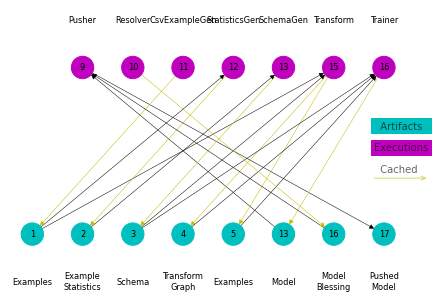

In [8]:
# Try different IDs here. Click stop in the plot when changing IDs.
%matplotlib inline
store.plot_artifact_lineage(17)